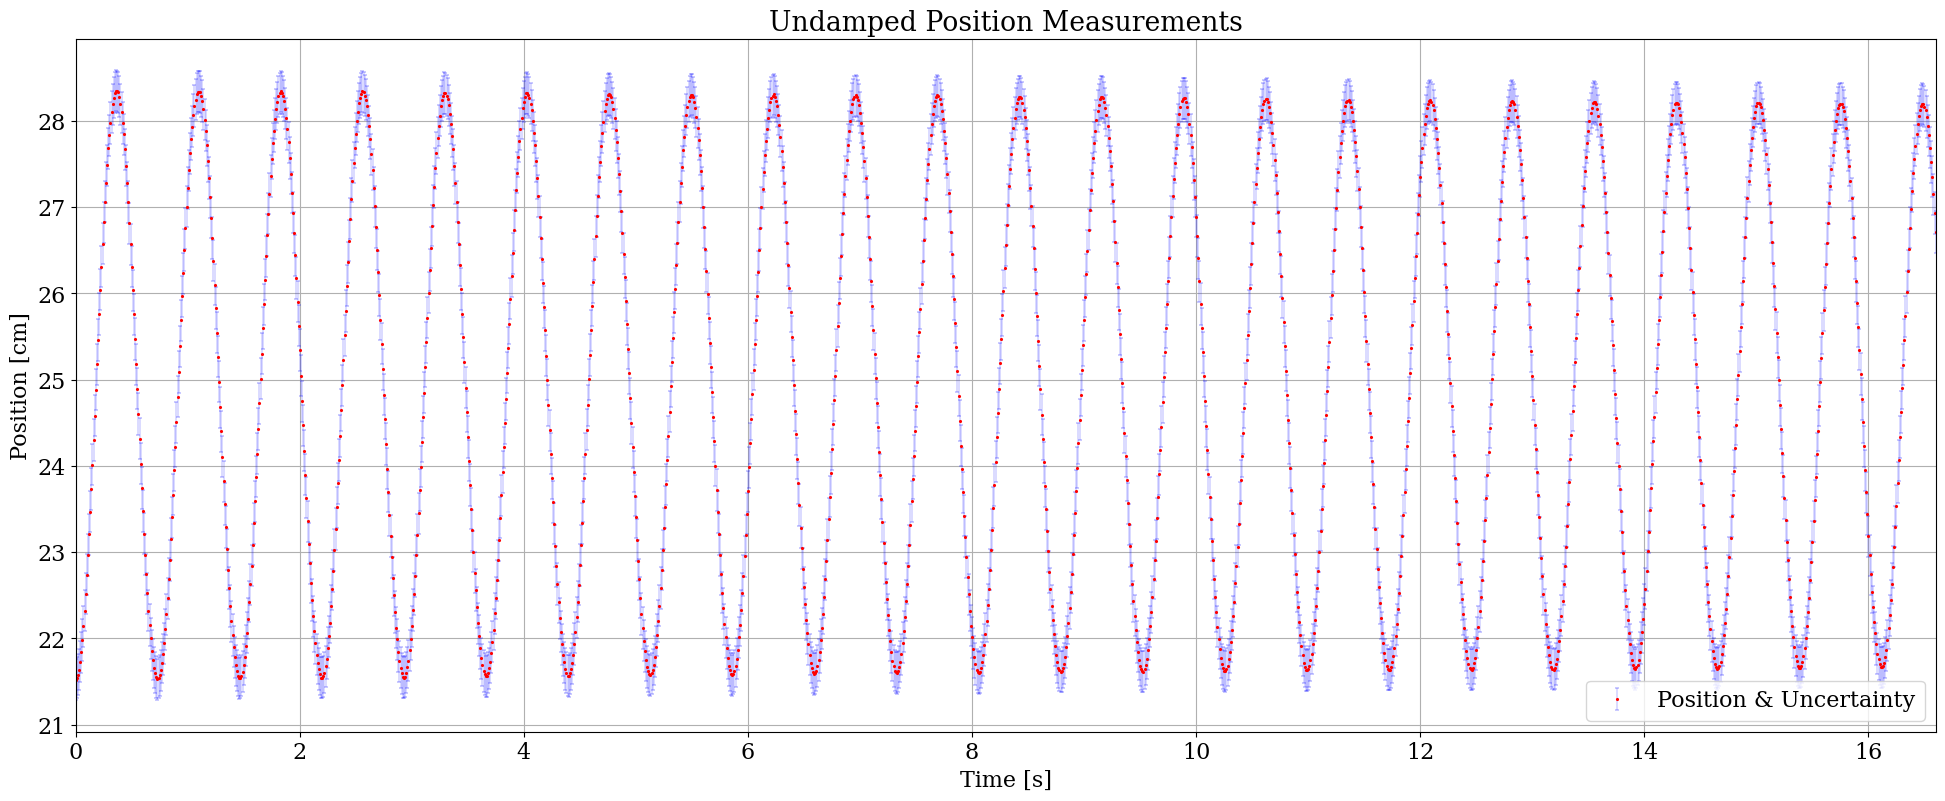

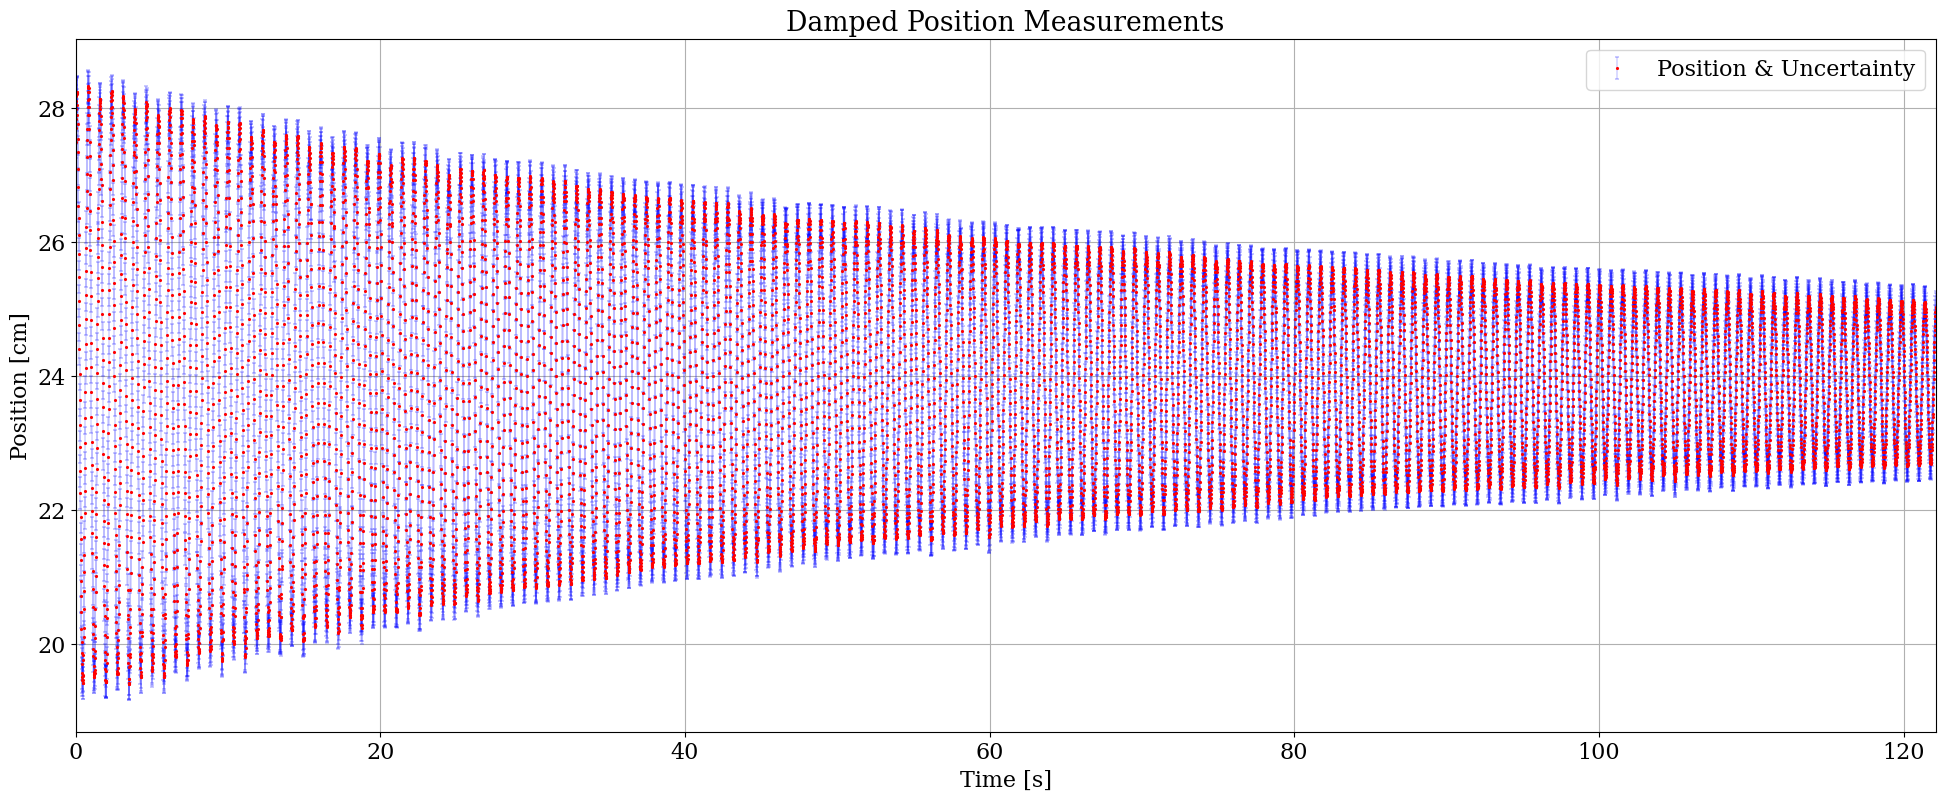

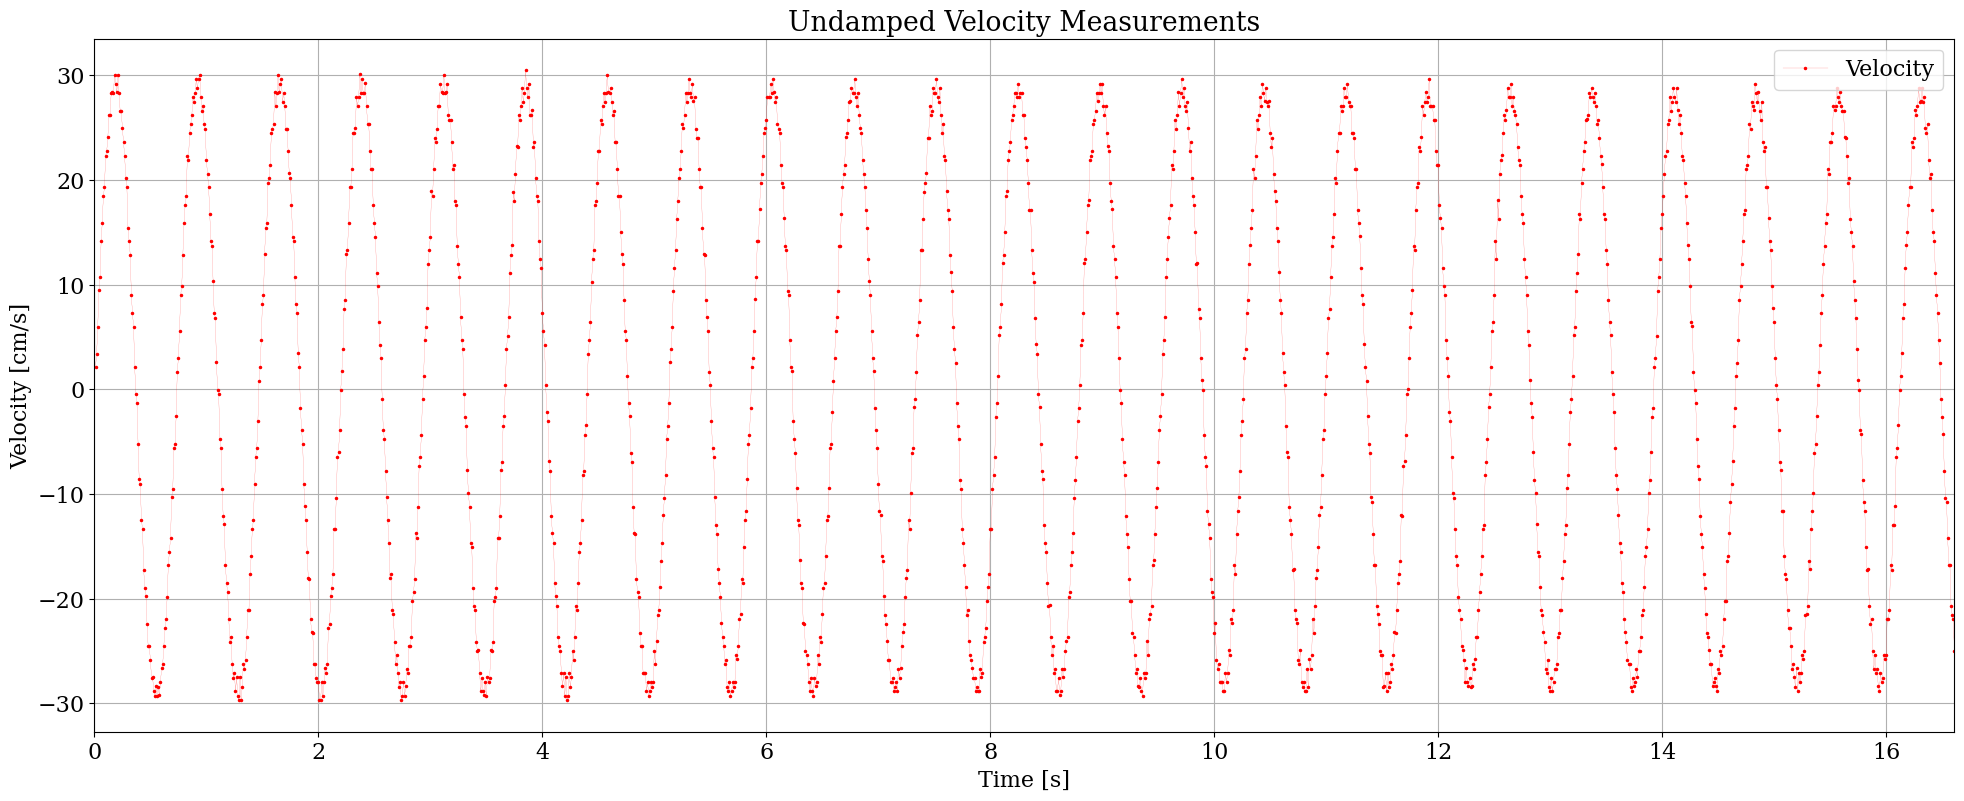

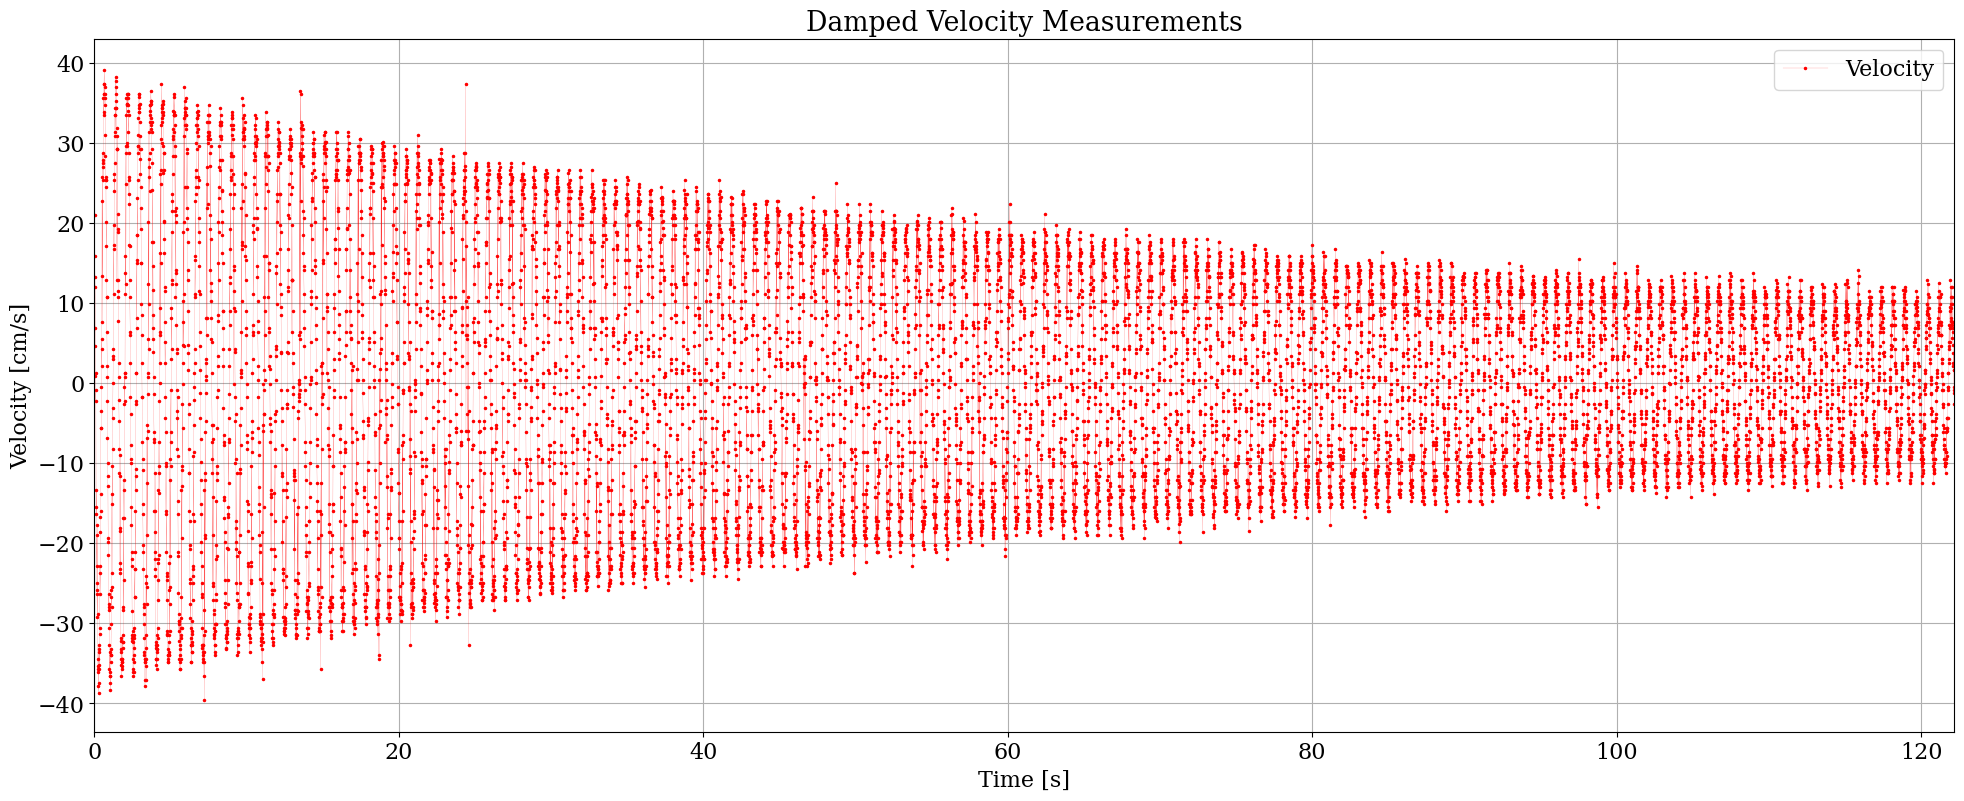

In [158]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'figure.figsize': (12, 9), 'font.family': 'serif'})

# Experimental Data Analysis
pos_header = ['time','dist','err']
vel_header = ['time','vel']
undamped_pos_data = np.genfromtxt('pos_undamped.txt', skip_header=2, delimiter="", names=pos_header)
undamped_vel_data = np.genfromtxt('vel_undamped.txt', skip_header=2, delimiter="", names=vel_header)
damped_pos_data = np.genfromtxt('pos_damped.txt', skip_header=2, delimiter="", names=pos_header)
damped_vel_data = np.genfromtxt('vel_damped.txt', skip_header=2, delimiter="", names=vel_header)

# undamped
undamped_pos = undamped_pos_data['dist']
undamped_pos_err = undamped_pos_data['err']
undamped_pos_time = undamped_pos_data['time']
undamped_vel = undamped_vel_data['vel']
undamped_vel_time = undamped_vel_data['time']

# damped 
damped_pos = damped_pos_data['dist']
damped_pos_err = damped_pos_data['err']
damped_pos_time = damped_pos_data['time']
damped_vel = damped_vel_data['vel']
damped_vel_time = damped_vel_data['time']

def plot_pos(time, pos, pos_err,title):
    fig = plt.figure(figsize=(24,9))
    plt.title(title)
    plt.xlim(min(time), max(time))
    plt.errorbar(time, pos, yerr=pos_err, fmt='o', label="Position & Uncertainty", linestyle='', capsize=1.5, markersize=1.25, c="red",capthick=0.3, elinewidth=0.2, ecolor='blue')
    #plt.scatter(time,pos, label="Undamped")
    plt.xlabel("Time [s]")
    plt.ylabel("Position [cm]")
    plt.legend()
    plt.grid()
    return fig

def plot_vel(time, vel, title):
    fig = plt.figure(figsize=(24,9))
    plt.title(title)
    plt.xlim(min(time), max(time))
    plt.plot(time, vel, label="Velocity", c="red", marker=".", markersize=3, lw=0.1)
    plt.xlabel("Time [s]")
    plt.ylabel("Velocity [cm/s]")
    plt.legend()
    plt.grid()
    return fig

plot_pos(undamped_pos_time, undamped_pos, undamped_pos_err, "Undamped Position Measurements").savefig("undamped_measurement.pdf")
plot_pos(damped_pos_time, damped_pos, damped_pos_err, "Damped Position Measurements").savefig("damped_measurement.pdf")
plot_vel(undamped_vel_time, undamped_vel, "Undamped Velocity Measurements").savefig("undamped_velocity.pdf")
plot_vel(damped_vel_time, damped_vel, "Damped Velocity Measurements").savefig("damped_velocity.pdf")

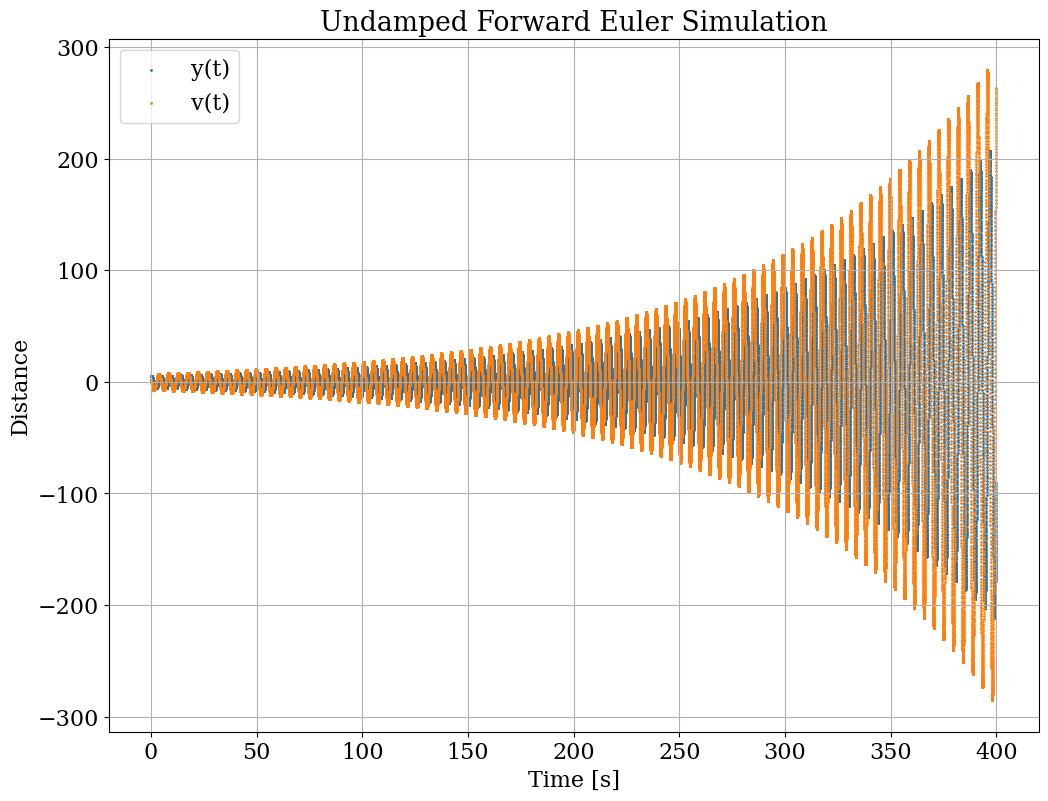

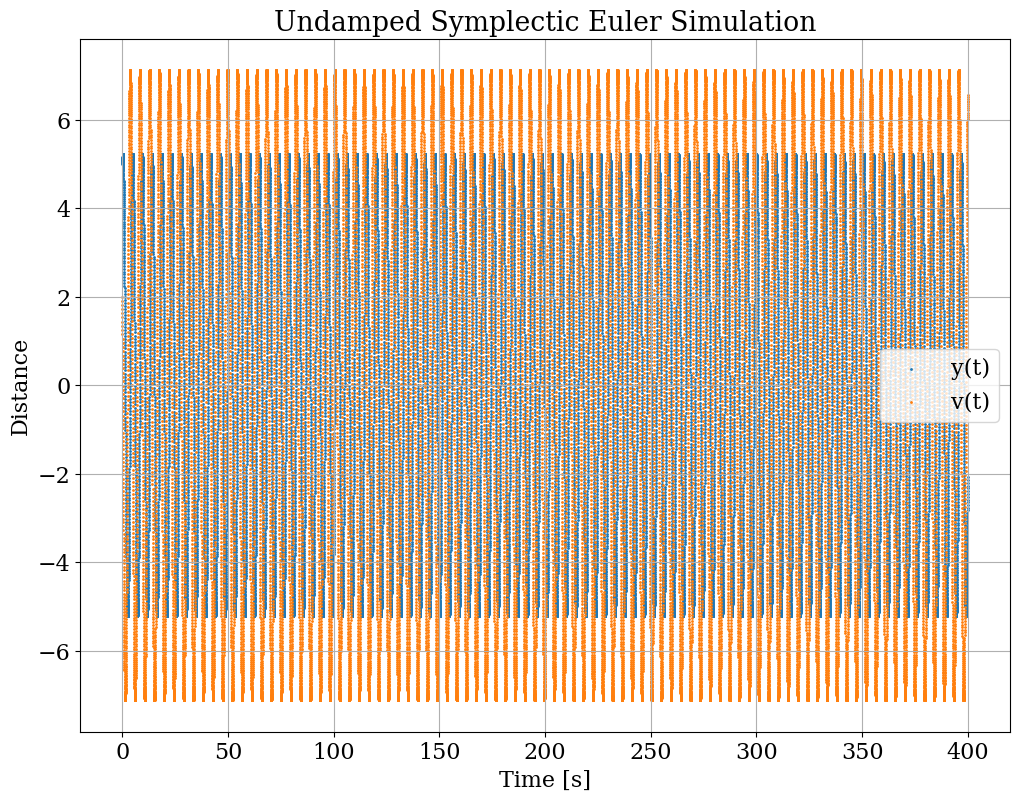

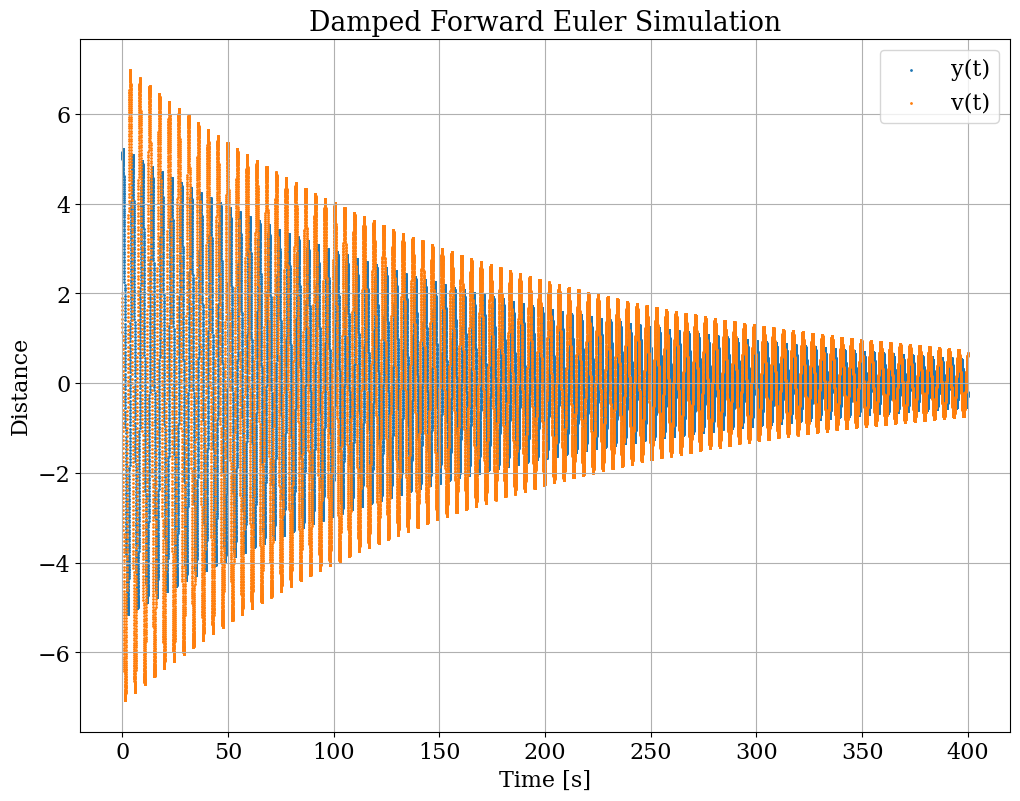

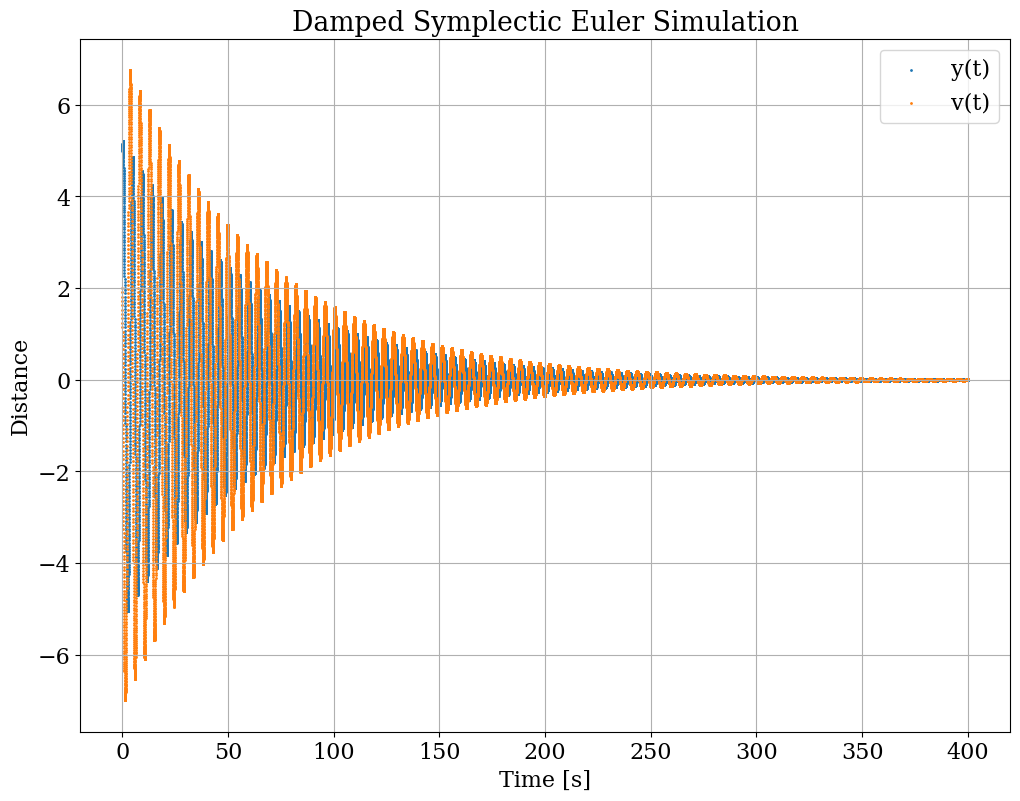

In [2]:
# Simulation
dt = 1/100
m1 = 0.2003 # w/o disk
m2 = 0.2171 # w/ disk
omega_0 = 1/.734
gamma = 0.03

def forward_euler(y_0, v_0, omega_0, dt, t_max):
    t = np.linspace(0,t_max, int(t_max/dt))
    y = np.zeros(len(t))
    v = np.zeros(len(t))  
    y[0] = y_0
    v[0] = v_0
    for i in range(1,len(t)):
        y[i] = y[i-1] + dt*v[i-1]
        v[i] = v[i-1] - dt*omega_0**2*y[i-1]
    return y, v, t

def symplectic_euler(y_0, v_0, omega_0, dt, t_max):
    t = np.linspace(0,t_max, int(t_max/dt))
    y = np.zeros(len(t))
    v = np.zeros(len(t))  
    y[0] = y_0
    v[0] = v_0
    for i in range(1,len(t)):
        y[i] = y[i-1] + dt*v[i-1]
        v[i] = v[i-1] - dt*omega_0**2*y[i]
    return y, v, t

def forward_euler_damped(y_0, v_0, omega_0, dt, t_max):
    t = np.linspace(0,t_max, int(t_max/dt))
    y = np.zeros(len(t))
    v = np.zeros(len(t))  
    y[0] = y_0
    v[0] = v_0
    for i in range(1,len(t)):
        y[i] = y[i-1] + dt*v[i-1]
        v[i] = v[i-1] - (omega_0**2*y[i-1] + gamma*v[i-1])*dt
    return y, v, t

def symplectic_euler_damped(y_0, v_0, omega_0, dt, t_max):
    t = np.linspace(0,t_max, int(t_max/dt))
    y = np.zeros(len(t))
    v = np.zeros(len(t))  
    y[0] = y_0
    v[0] = v_0
    for i in range(1,len(t)):
        y[i] = y[i-1] + dt*v[i-1]
        v[i] = v[i-1] - dt*(omega_0**2*y[i] + gamma*v[i-1])
    return y, v, t

y, v, t = forward_euler(5, 2, omega_0, dt, 400)
fig = plt.figure()
plt.title("Undamped Forward Euler Simulation")
plt.scatter(t,y, label="y(t)",s=1)
plt.scatter(t,v, label="v(t)",s=1)
plt.xlabel("Time [s]")
plt.ylabel("Distance")
plt.legend()
plt.grid()
fig.savefig("undamped_forward.pdf")


y_sym, v_sym, t_sym = symplectic_euler(5, 2, omega_0, dt, 400)
fig = plt.figure()
plt.title("Undamped Symplectic Euler Simulation")
plt.scatter(t_sym,y_sym, label="y(t)",s=1)
plt.scatter(t_sym,v_sym, label="v(t)",s=1)
plt.xlabel("Time [s]")
plt.ylabel("Distance")
plt.legend()
plt.grid()
fig.savefig("undamped_symplectic.pdf")


y, v, t = forward_euler_damped(5, 2, omega_0, dt, 400)
fig = plt.figure()
plt.title("Damped Forward Euler Simulation")
plt.scatter(t,y, label="y(t)", s=1)
plt.scatter(t,v, label="v(t)", s=1)
plt.xlabel("Time [s]")
plt.ylabel("Distance")
plt.legend()
plt.grid()
fig.savefig("damped_forward.pdf")

y_sym, v_sym, t_sym = symplectic_euler_damped(5, 2, omega_0, dt, 400)
fig = plt.figure()
plt.title("Damped Symplectic Euler Simulation")
plt.scatter(t_sym,y_sym, label="y(t)", s=1)
plt.scatter(t_sym,v_sym, label="v(t)", s=1)
plt.xlabel("Time [s]")
plt.ylabel("Distance")
plt.legend()
plt.grid()
fig.savefig("damped_symplectic.pdf")

